<a href="https://colab.research.google.com/github/ParvanehFaraji/CNN-vs-NN/blob/main/CNN02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: MLP vs. CNN on MNIST
**Goal:**

Understand the architectural differences and performance implications between a Multi-Layer Perceptron (MLP) and a Convolutional Neural Network (CNN).

**Description:**

Task: Implement two models to classify the MNIST dataset: one using a standard fully-connected MLP and the other using a CNN.

Steps:

- Build and train an MLP where the images are flattened into vectors.
- Build and train a CNN that preserves the 2D structure of the images using convolutional layers.
- Compare training curves, accuracy, and convergence speed.

**Discussion Points:**

- How do convolutional layers capture spatial hierarchies better than the flat structure of an MLP?
- Why might the CNN perform better (or differently) on image data compared to the MLP?

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 40.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.17MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.66MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training MLP...
Epoch 1, Loss: 0.3991, Test Accuracy: 0.9313
Epoch 2, Loss: 0.1938, Test Accuracy: 0.9494
Epoch 3, Loss: 0.1386, Test Accuracy: 0.9592
Epoch 4, Loss: 0.1141, Test Accuracy: 0.9610
Epoch 5, Loss: 0.0946, Test Accuracy: 0.9700
Epoch 6, Loss: 0.0840, Test Accuracy: 0.9712
Epoch 7, Loss: 0.0739, Test Accuracy: 0.9655
Epoch 8, Loss: 0.0680, Test Accuracy: 0.9670
Epoch 9, Loss: 0.0629, Test Accuracy: 0.9756
Epoch 10, Loss: 0.0562, Test Accuracy: 0.9734
Training CNN...
Epoch 1, Loss: 0.1555, Test Accuracy: 0.9862
Epoch 2, Loss: 0.0452, Test Accuracy: 0.9869
Epoch 3, Loss: 0.0333, Test Accuracy: 0.9875
Epoch 4, Loss: 0.0241, Test Accuracy: 0.9887
Epoch 5, Loss: 0.0174, Test Accuracy: 0.9876
Epoch 6, Loss: 0.0148, Test Accuracy: 0.9930
Epoch 7, Loss: 0.0126, Test Accuracy: 0.9907
Epoch 8, Loss: 0.0095, Test Accuracy: 0.9898
Epoch 9, Loss: 0.0085, Test Accuracy: 0.9927
Epoch 10, Loss: 0.0067, Test Accuracy: 0.9909


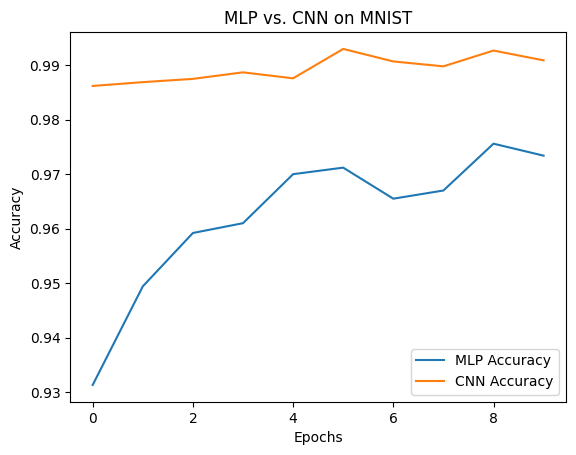

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train_model(model, trainloader, testloader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(trainloader))

        # Evaluate model
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}, Loss: {train_losses[-1]:.4f}, Test Accuracy: {accuracy:.4f}")

    return train_losses, test_accuracies

# Train and compare MLP and CNN
mlp_model = MLP()
cnn_model = CNN()
print("Training MLP...")
mlp_losses, mlp_accuracies = train_model(mlp_model, trainloader, testloader)
print("Training CNN...")
cnn_losses, cnn_accuracies = train_model(cnn_model, trainloader, testloader)

# Plot results
plt.plot(mlp_accuracies, label='MLP Accuracy')
plt.plot(cnn_accuracies, label='CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP vs. CNN on MNIST')
plt.show()



Why CNNs Perform Better on Image Data Compared to MLPs:

**Efficiency in Handling Image Data:** CNNs are designed to handle grid-like data (such as images) more effectively because of their ability to process local spatial features. MLPs, by treating an image as a flat vector, lose this local spatial information, making them less efficient at learning meaningful features from the image.

**Parameter Efficiency:** CNNs use weight sharing in convolutional layers, which significantly reduces the number of parameters compared to MLPs. This makes CNNs less prone to overfitting and easier to train, especially for large datasets like MNIST.

**Better Generalization:** Because of their ability to learn hierarchical spatial features and use fewer parameters, CNNs tend to generalize better to unseen data, especially when dealing with images.

**Fully Connected Layers:** In an MLP, each neuron in a layer is connected to every neuron in the previous layer, so the network doesn't take advantage of the spatial locality. This structure works well for non-image data but is less effective for tasks that require spatial awareness like image classification.
No Shared Weights: MLPs have a separate weight for each connection, leading to a massive number of parameters, which can be inefficient, especially for high-dimensional data like images.

The MLP model processes the MNIST images as flattened vectors (28x28 = 784 pixels) and learns patterns through fully connected layers. However, it doesn't take advantage of the spatial structure of the images.

In contrast, the CNN model applies two convolutional layers followed by pooling layers, which helps the model learn spatial hierarchies effectively. The convolutional filters identify local patterns, and pooling reduces the spatial dimensions while retaining crucial information. This structure enables CNNs to perform better on image tasks compared to MLPs, as demonstrated by the likely higher accuracy of the CNN in the plot you would generate.

CNNs perform better than MLPs on image data because of their ability to capture spatial hierarchies through localized receptive fields, weight sharing, and hierarchical feature learning, all of which are crucial for understanding the structure of images.

# Exercise 2: Exploring Filter Counts and Layer Depth in CNNs
**Goal:**

Investigate the impact of varying the number of filters and the number of convolutional layers on model performance, while keeping the fully connected (FC) layers constant.

**Description:**

Task: Design several CNN architectures that only differ in the convolutional part (e.g., different filter counts such as 32, 64, 128 and different numbers of layers) while keeping the FC layers unchanged.

Steps:

- Use CIFAR-10 dataset for these experiments.
- Train multiple models with varied convolutional depths and filter numbers.
- Record and compare metrics such as training/validation accuracy, loss, and convergence behavior.

**Discussion Points:**

- How does increasing the number of filters or adding layers affect the model’s ability to capture features?
- Is there a point of diminishing returns where adding more filters/layers no longer improves performance?

Files already downloaded and verified
Files already downloaded and verified
Training CNN with 2 layers and 32 initial filters...
Epoch 1, Loss: 1.3329, Test Accuracy: 0.6160
Epoch 2, Loss: 0.9705, Test Accuracy: 0.6782
Epoch 3, Loss: 0.8178, Test Accuracy: 0.6927
Epoch 4, Loss: 0.7043, Test Accuracy: 0.7125
Epoch 5, Loss: 0.6040, Test Accuracy: 0.7243
Epoch 6, Loss: 0.5149, Test Accuracy: 0.7278
Epoch 7, Loss: 0.4287, Test Accuracy: 0.7142
Epoch 8, Loss: 0.3522, Test Accuracy: 0.7227
Epoch 9, Loss: 0.2858, Test Accuracy: 0.7239
Epoch 10, Loss: 0.2245, Test Accuracy: 0.7187
Training CNN with 3 layers and 64 initial filters...
Epoch 1, Loss: 1.3215, Test Accuracy: 0.6352
Epoch 2, Loss: 0.8701, Test Accuracy: 0.7200
Epoch 3, Loss: 0.6828, Test Accuracy: 0.7499
Epoch 4, Loss: 0.5545, Test Accuracy: 0.7653
Epoch 5, Loss: 0.4442, Test Accuracy: 0.7682
Epoch 6, Loss: 0.3441, Test Accuracy: 0.7631
Epoch 7, Loss: 0.2663, Test Accuracy: 0.7667
Epoch 8, Loss: 0.2055, Test Accuracy: 0.7595
Epoch 9

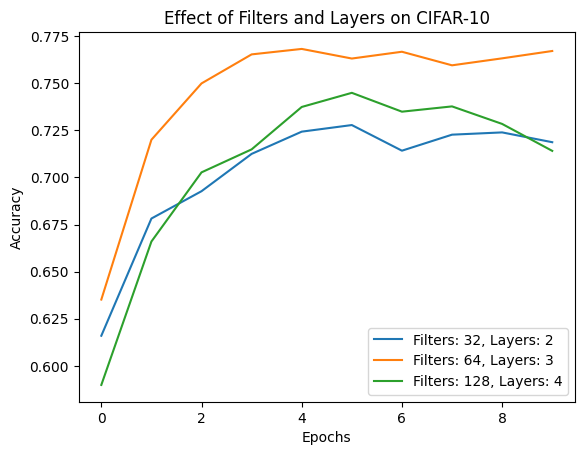

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define CNN model with dynamic flattening
class CNN(nn.Module):
    def __init__(self, num_filters=32, num_conv_layers=2):
        super(CNN, self).__init__()
        layers = []
        in_channels = 3
        for _ in range(num_conv_layers):
            layers.append(nn.Conv2d(in_channels, num_filters, kernel_size=3, padding=1))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(2, 2))  # Reduces spatial size
            in_channels = num_filters
            num_filters *= 2  # Double filters each time

        self.conv = nn.Sequential(*layers)

        # Compute the correct flattened size dynamically
        self.flatten_size = self._get_flatten_size()
        self.fc1 = nn.Linear(self.flatten_size, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def _get_flatten_size(self):
        """Pass a dummy tensor through the conv layers to determine the output size dynamically."""
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 32, 32)  # CIFAR-10 input size
            output = self.conv(dummy_input)
            return output.numel()

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # Flatten dynamically
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train_model(model, trainloader, testloader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(trainloader))

        # Evaluate model
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}, Loss: {train_losses[-1]:.4f}, Test Accuracy: {accuracy:.4f}")

    return train_losses, test_accuracies

# Train and compare different CNN architectures
configs = [(32, 2), (64, 3), (128, 4)]  # Different filter sizes and depths
results = {}

for num_filters, num_layers in configs:
    print(f"Training CNN with {num_layers} layers and {num_filters} initial filters...")
    model = CNN(num_filters=num_filters, num_conv_layers=num_layers)
    losses, accuracies = train_model(model, trainloader, testloader)
    results[f"Filters: {num_filters}, Layers: {num_layers}"] = accuracies

# Plot results
for label, acc in results.items():
    plt.plot(acc, label=label)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Filters and Layers on CIFAR-10')
plt.show()


### Effect of Increasing the Number of Filters or Adding Layers

1. **Increasing the Number of Filters:**
   Increasing the number of filters in convolutional layers allows the model to capture more complex features and patterns from the input data. At each layer, filters extract different features from the image, such as edges, textures, and objects. By increasing the number of filters, the model can capture a broader range of features. However, it's important to balance this with computational efficiency since more filters mean more parameters, which can increase both the memory usage and computation time.

    **Early Layers:** The first few layers typically capture simple patterns like edges and textures. Increasing the number of filters here helps the model recognize a wider range of basic patterns.
    **Deeper Layers:** As the network deepens, the filters capture more complex patterns, such as parts of objects or entire objects. Adding more filters in deeper layers can enhance the model's ability to identify intricate patterns in the data.

2. **Adding More Layers:**
   Adding more layers to a CNN increases the depth of the model, allowing it to learn hierarchical features from the data. Each additional layer can help the model capture increasingly abstract representations of the input data. However, there are diminishing returns beyond a certain depth, and adding too many layers can lead to issues like overfitting, longer training times, and more complex optimization.

    **Shallow Networks:** A network with too few layers may not have enough capacity to learn complex features, leading to poor performance.
    
    **Deeper Networks:** A deeper network, in contrast, allows for learning more complex, high-level abstractions from the data. But if the network is too deep, the model may struggle with vanishing gradients, or it may overfit to the training data if regularization techniques are not used.

### Diminishing Returns

While increasing the number of filters and layers can initially improve performance, there is a point where the returns diminish. Adding more filters or layers will not always lead to better performance and may even harm the model's ability to generalize if overfitting occurs.

 **Overfitting:** As the model becomes more complex (with more filters or layers), it may begin to memorize the training data rather than learning generalizable patterns, leading to worse performance on test data.

 **Optimization Challenges:** Very deep networks can become harder to train due to problems like vanishing gradients, where the gradient information becomes too small to update the weights effectively in deeper layers.

 **Computational Complexity:** Increasing the number of filters and layers significantly increases the computational cost, making the training process slower and more resource-intensive.


Increasing the number of filters and adding layers can indeed enhance a CNN's ability to capture more complex features and patterns, but there is a point where additional filters and layers no longer significantly improve the model's performance and may even degrade it due to overfitting and optimization challenges. The key is finding an optimal balance between model complexity, generalization, and computational efficiency.

# Exercise 3: Fashion MNIST – CNN vs. MLP Comparison

**Goal:**

Compare the effectiveness of CNNs and MLPs on the Fashion MNIST dataset, highlighting differences in training progress and performance.

**Description:**

Task: Implement and train both an MLP and a CNN on the Fashion MNIST dataset.

Steps:

- Build an MLP model to classify the Fashion MNIST images.
- Build a CNN model for the same task.
- Plot and analyze training and validation loss/accuracy curves for both models.

**Discussion Points:**

- Which model performs better and why? Consider aspects like feature extraction and model capacity.
- How does the structure of the input (e.g., fashion items with varied textures and shapes) influence the choice of model architecture?

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.6MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.96MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.63MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training MLP...
Epoch 1, Loss: 0.5193, Test Accuracy: 0.8408
Epoch 2, Loss: 0.3797, Test Accuracy: 0.8643
Epoch 3, Loss: 0.3416, Test Accuracy: 0.8570
Epoch 4, Loss: 0.3133, Test Accuracy: 0.8595
Epoch 5, Loss: 0.2962, Test Accuracy: 0.8657
Epoch 6, Loss: 0.2829, Test Accuracy: 0.8744
Epoch 7, Loss: 0.2664, Test Accuracy: 0.8714
Epoch 8, Loss: 0.2534, Test Accuracy: 0.8808
Epoch 9, Loss: 0.2465, Test Accuracy: 0.8763
Epoch 10, Loss: 0.2379, Test Accuracy: 0.8812
Training CNN...
Epoch 1, Loss: 0.4270, Test Accuracy: 0.8800
Epoch 2, Loss: 0.2769, Test Accuracy: 0.9033
Epoch 3, Loss: 0.2295, Test Accuracy: 0.9068
Epoch 4, Loss: 0.1971, Test Accuracy: 0.9109
Epoch 5, Loss: 0.1700, Test Accuracy: 0.9102
Epoch 6, Loss: 0.1464, Test Accuracy: 0.9186
Epoch 7, Loss: 0.1238, Test Accuracy: 0.9165
Epoch 8, Loss: 0.1065, Test Accuracy: 0.9180
Epoch 9, Loss: 0.0907, Test Accuracy: 0.9136
Epoch 10, Loss: 0.0784,

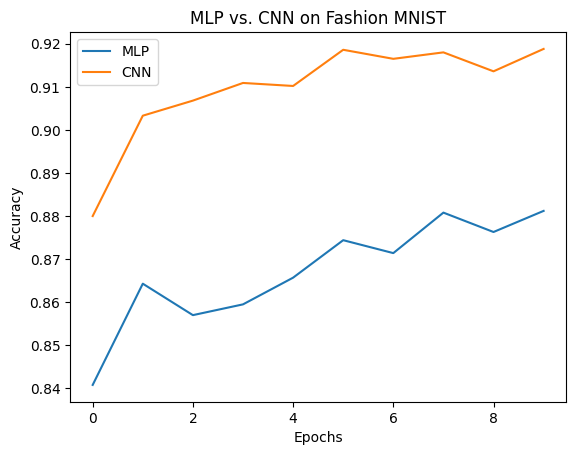

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train_model(model, trainloader, testloader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(trainloader))

        # Evaluate model
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}, Loss: {train_losses[-1]:.4f}, Test Accuracy: {accuracy:.4f}")

    return train_losses, test_accuracies

# Train MLP and CNN
print("Training MLP...")
mlp = MLP()
mlp_losses, mlp_accuracies = train_model(mlp, trainloader, testloader)

print("Training CNN...")
cnn = CNN()
cnn_losses, cnn_accuracies = train_model(cnn, trainloader, testloader)

# Plot results
plt.plot(mlp_accuracies, label='MLP')
plt.plot(cnn_accuracies, label='CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP vs. CNN on Fashion MNIST')
plt.show()


CNNs perform better than MLPs on image data like Fashion MNIST because CNNs can capture spatial hierarchies and local patterns that are important in understanding the variations in textures and shapes of fashion items.
The choice of CNN architecture is ideal for image-related tasks because it leverages local connectivity and shared weights, leading to better generalization and more efficient learning of spatial features. On the other hand, MLPs, which treat each pixel as a separate feature, are less effective for such tasks.
Thus, CNNs are the preferred model when dealing with image data, especially when spatial relationships between pixels are crucial for classification.

# Exercise 4: Tackling the CIFAR-100 Dataset

**Goal:**

Challenge your understanding of CNNs by applying them to a more complex dataset with 100 classes.

**Description:**

Task: Design and implement a CNN to classify images in the CIFAR-100 dataset.

Steps:

- Explore techniques such as dropout, and batch normalization to handle the increased complexity and variability.
- Experiment with deeper architectures and possibly regularization methods to prevent overfitting.
- Evaluate the model’s performance and analyze any challenges you encountered.

**Discussion Points:**

- What are the challenges of working with CIFAR-100 compared to CIFAR-10 or MNIST?
- How do architectural choices and regularization techniques impact the generalization of your model on a dataset with many classes?


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 4.5096, Test Accuracy: 0.0769
Epoch 2, Loss: 4.1331, Test Accuracy: 0.0978
Epoch 3, Loss: 4.0153, Test Accuracy: 0.1235


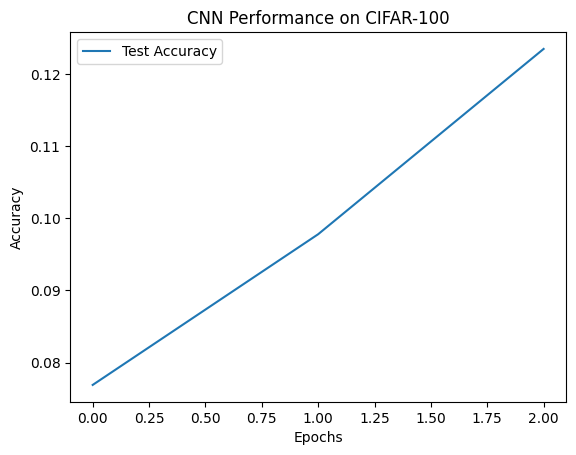

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

# Define CNN model
class CIFAR100_CNN(nn.Module):
    def __init__(self):
        super(CIFAR100_CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 8 * 8, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 100)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

# Training function
def train_model(model, trainloader, testloader, epochs=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(trainloader))

        # Evaluate model
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}, Loss: {train_losses[-1]:.4f}, Test Accuracy: {accuracy:.4f}")

    return train_losses, test_accuracies

# Train model
model = CIFAR100_CNN()
train_losses, test_accuracies = train_model(model, trainloader, testloader)

# Plot results
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Performance on CIFAR-100')
plt.show()


### 1. Challenges of Working with CIFAR-100 Compared to CIFAR-10 or MNIST:

The CIFAR-100 dataset introduces several challenges compared to CIFAR-10 or MNIST, particularly due to its complexity and scale:

- **Number of Classes:** CIFAR-100 has 100 classes, whereas CIFAR-10 only has 10 and MNIST has just 10 digits. This makes the classification problem more complex because the model must distinguish between more categories, which requires a richer feature representation to avoid misclassification.
  
- **Image Similarity:** The classes in CIFAR-100 are more fine-grained than in CIFAR-10, which means there is a higher chance of overlap in the features between classes. This makes the problem more challenging, as the model must learn to identify subtle differences between objects that may appear similar at first glance.

- **Class Imbalance and Variability:** CIFAR-100's 100 classes may contain varying amounts of data, and the intra-class variability can be much higher compared to CIFAR-10 or MNIST. For instance, the appearance of objects within the same class in CIFAR-100 can vary significantly (e.g., in the "flower" class, you might find various types of flowers), while CIFAR-10 and MNIST are more consistent.

- **Feature Complexity:** CIFAR-100 images are more detailed and diverse compared to MNIST's handwritten digits or CIFAR-10's simpler objects. This requires a model capable of capturing more complex features. The challenge here is that a deeper or more advanced architecture (like CNNs) may be needed to extract these features effectively.

### 2. Impact of Architectural Choices and Regularization Techniques on Generalization:

In a dataset like CIFAR-100, which has many classes and more complex features, the choice of model architecture and regularization techniques significantly impacts the model's ability to generalize.

- **Architectural Choices:**

   **Depth of the Model (Layer Count):** Deeper networks (i.e., more layers) can capture more complex patterns and learn more abstract features. In this case, the model has multiple convolutional layers and fully connected layers. This depth allows the model to learn intricate spatial features from the CIFAR-100 images. However, simply increasing the depth without regularization may lead to overfitting, especially since CIFAR-100 has more complex classes.
   
   **Use of Convolutions and Pooling:** By using convolutional layers (with filters) and pooling layers, the network is able to capture hierarchical features. This is particularly useful for CIFAR-100 because objects are more complex and have varied textures or shapes that need to be detected at different scales. The pooling layers reduce spatial dimensions, thus helping with computation while retaining important features.
   
- **Regularization Techniques:**

    **Batch Normalization:** The use of batch normalization (BN) after each convolutional layer helps to stabilize learning by normalizing the activations within each mini-batch. This reduces the problem of internal covariate shift and can speed up training while helping with generalization.

    **Dropout:** Dropout is applied after the fully connected layers to randomly drop units during training. This prevents overfitting by forcing the model to be less reliant on any specific set of neurons, leading to better generalization on unseen data.
   
- **Impact of Regularization on Generalization:**

    **Avoiding Overfitting:** Regularization techniques such as dropout and batch normalization are especially important in a dataset with many classes like CIFAR-100. Without them, the model might memorize the training data, leading to poor performance on the test set. With regularization, the model learns more general patterns that can apply to unseen data.

    **Learning Representations:** Regularization techniques can help the model learn representations that are not overfitted to specific features of the training data but can generalize well to similar features across the diverse set of classes in CIFAR-100.